In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy
import numpy as np
import glob
from scipy.stats import mannwhitneyu
from matplotlib.pyplot import subplot_mosaic as mosaic
import matplotlib.transforms as mtransforms
import math
import matplotlib

# Result visualization

In [2]:
cwd = os.getcwd()
n = 100 # nb of random partitions
k = 5000 # nb of max top_k_edges selected
m = 10 # number of iterations on confounder-based partitions
ct_sels = ['BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUSC', 'PCPG', 'READ', 'STAD'] # string identifiers of cohorts
confs = ['age_at_initial_pathologic_diagnosis', 'gender.demographic', 'race.demographic', 'tumor_stage.diagnoses']#['age', 'sex', 'race', 'stage'] # string identifiers of confounders/variables
algs = ['ARACNE', 'CEMITOOL', 'GRNBOOST2', 'WGCNA'] # string identifiers of algorithms
alpha = 0.05

### Read data from Jaccard Indices for all tools, confounders, cohorts and partition types

In [3]:
JI = pd.DataFrame(columns = ['Confounder/\nvariable', 'Cohort', 'Method', 'Partition type', 'partID', 'k', 'mean JI'])
for alg_sel in algs:
    for conf_sel in confs:
        for ct_sel in ct_sels:
            path = os.path.join(cwd, alg_sel, str(ct_sel))#'JI_'+str(alg_sel)+'_'+str(ct_sel))
            for i in range(m):
                filename = 'cb'+'_'+str(i)+'_'+alg_sel+'_'+conf_sel+'_'+ct_sel+'_jaccInd.csv'
                try:
                    df_conf = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                    df_conf['partID'] = i
                    df_conf['Partition type'] = 'confounder-based partition'
                    df_conf['Method'] = alg_sel
                    df_conf['Cohort'] = ct_sel
                    df_conf['Confounder/\nvariable'] = conf_sel
                except:
                    print(filename)
                    continue
                JI = pd.concat([JI, df_conf])
                
for alg_sel in algs:
    for conf_sel in confs:
        for ct_sel in ct_sels:
            path = os.path.join(cwd, alg_sel, str(ct_sel))#'JI_'+str(alg_sel)+'_'+str(ct_sel))
            for i in range(n):
                filename = 'rnd'+'_'+str(i)+'_'+alg_sel+'_'+conf_sel+'_'+ct_sel+'_jaccInd.csv'
                try:
                    df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                    df_rnd['partID'] = i
                    df_rnd['Partition type'] = 'random partition'
                    df_rnd['Method'] = alg_sel
                    df_rnd['Cohort'] = ct_sel
                    df_rnd['Confounder/\nvariable'] = conf_sel
                except:
                    print(filename)
                    continue
                JI = pd.concat([JI, df_rnd])


cb_0_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_1_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_2_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_3_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_4_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_5_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_6_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_7_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_8_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_9_ARACNE_gender.demographic_BRCA_jaccInd.csv
cb_0_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_1_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_2_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_3_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_4_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_5_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_6_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_7_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_8_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_9_ARACNE_gender.demographic_CESC_jaccInd.csv
cb_0_ARACNE_race.demographic_GBM_jaccInd

In [23]:
JI_all = JI.copy()
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race.demographic'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['gender.demographic'], 'sex')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['tumor_stage.diagnoses'], 'stage')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['age_at_initial_pathologic_diagnosis'], 'age')
JI_all.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
confs = ['age', 'ethnicity', 'sex', 'stage']
JI_all = JI_all[JI_all['k']%100 == 10]
JI_all['Method'] = JI_all['Method'].replace(['ARACNE'], 'ARACNe-AP').replace(['CEMITOOL'], 'CEMiTool').replace(['GRNBOOST2'], 'GRNBoost2')
JI_all['Cohort x\nConfounder'] = JI_all['Cohort'] + ' x ' + JI_all['Confounder/\nvariable']
JI_all.reset_index(inplace=True)

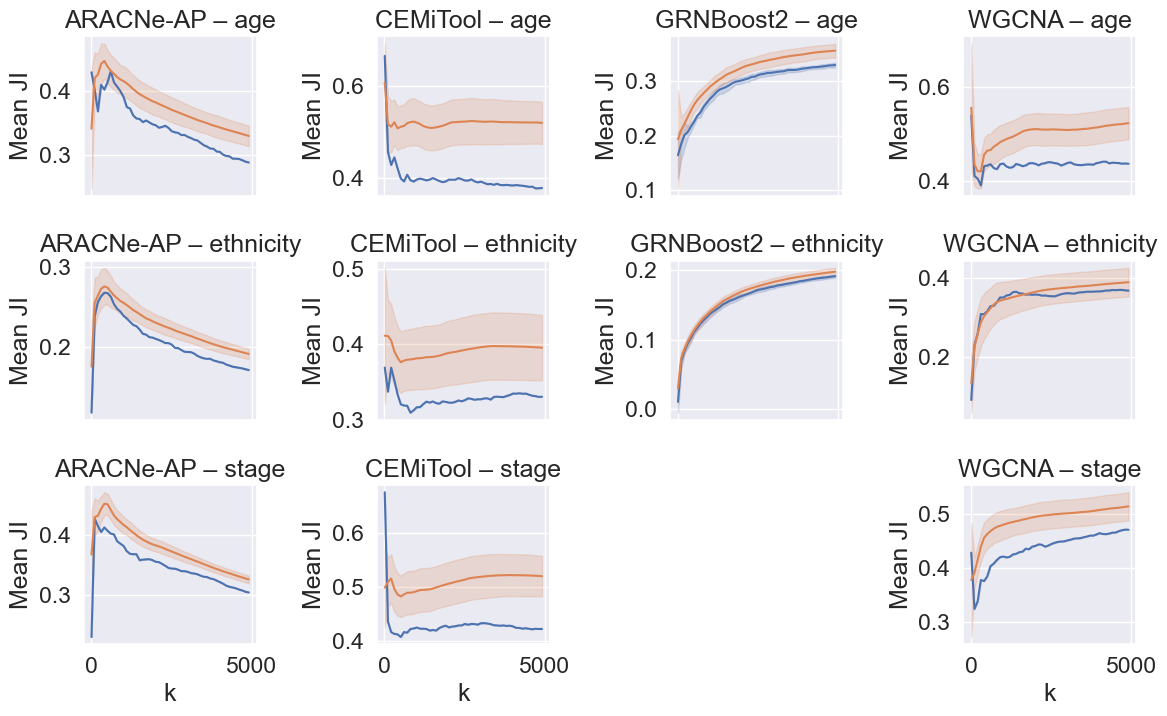

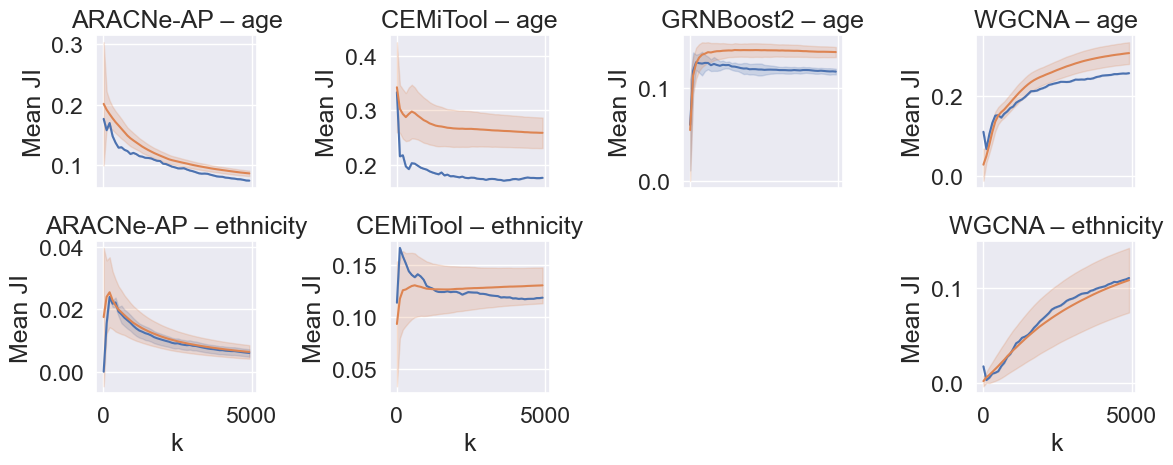

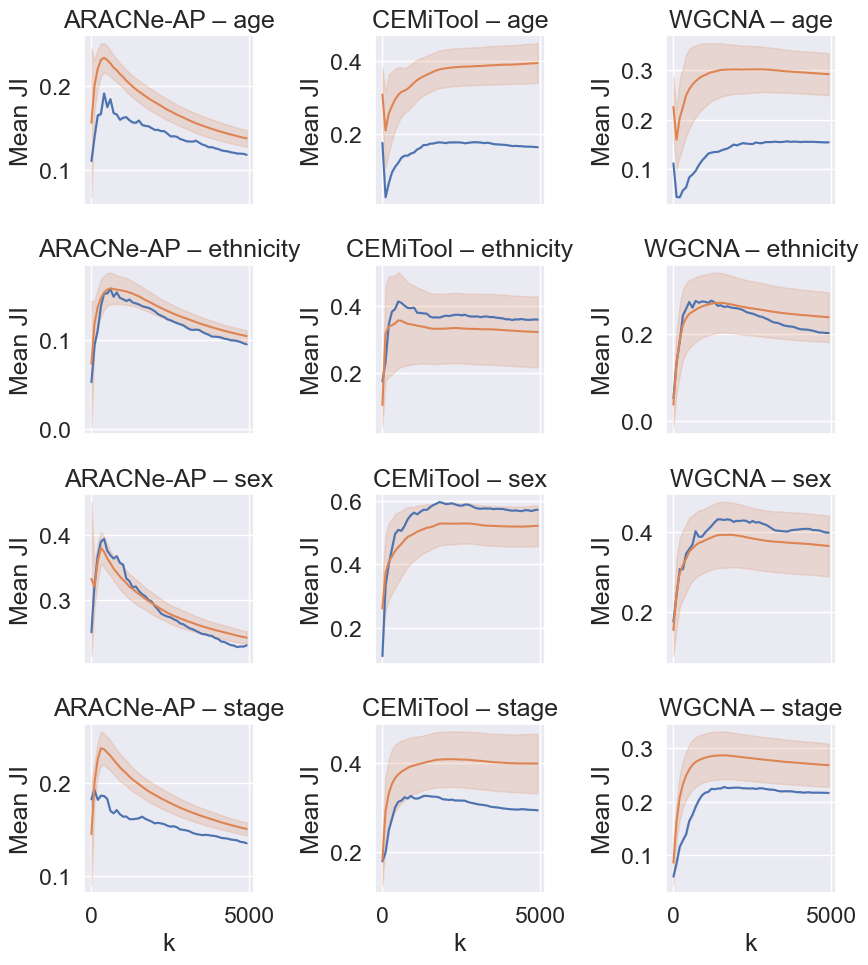

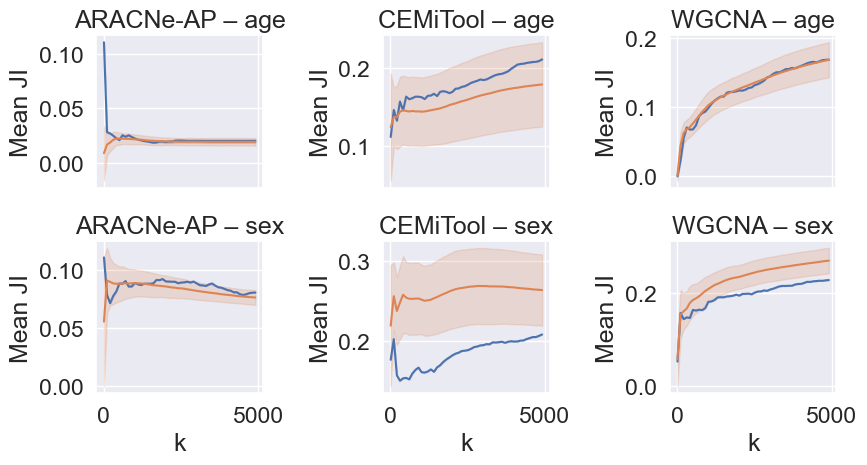

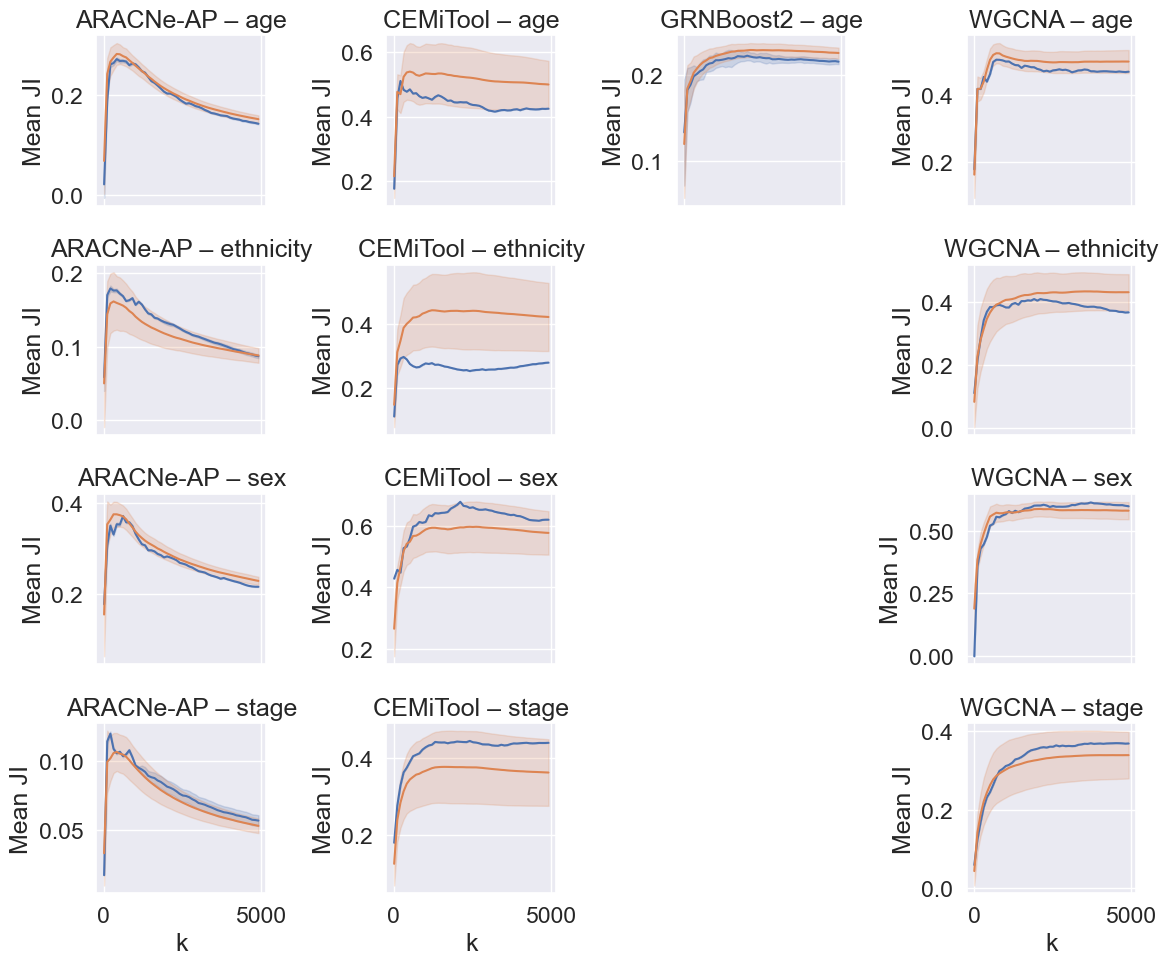

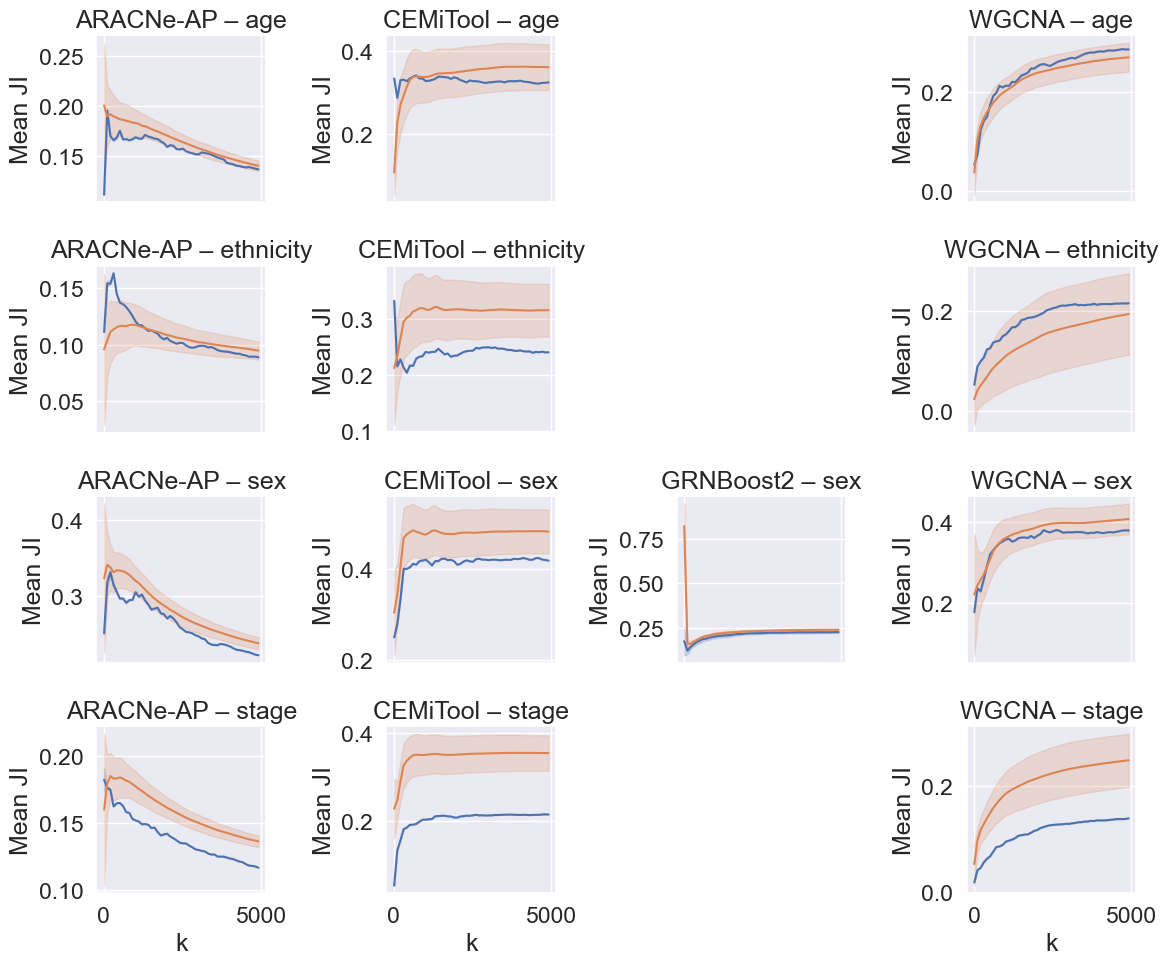

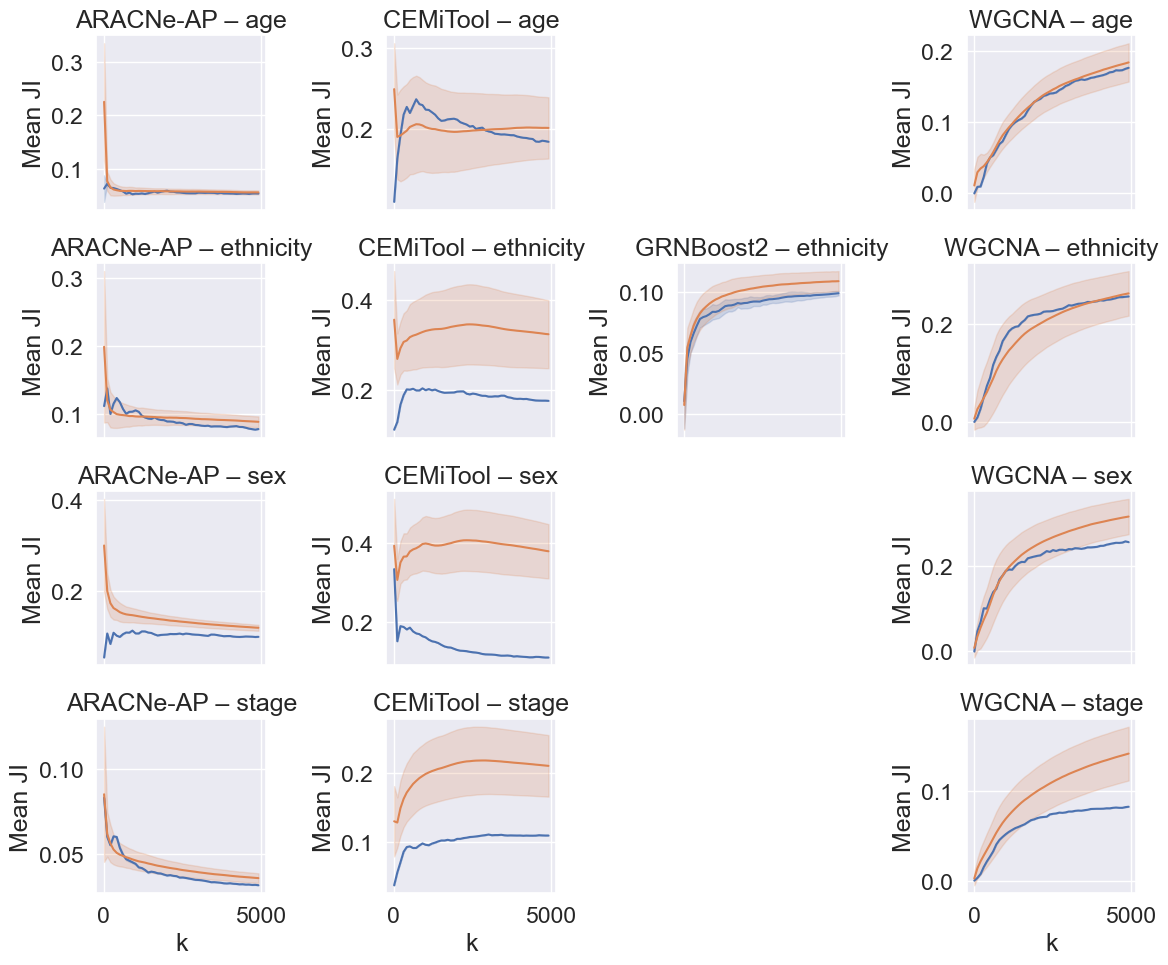

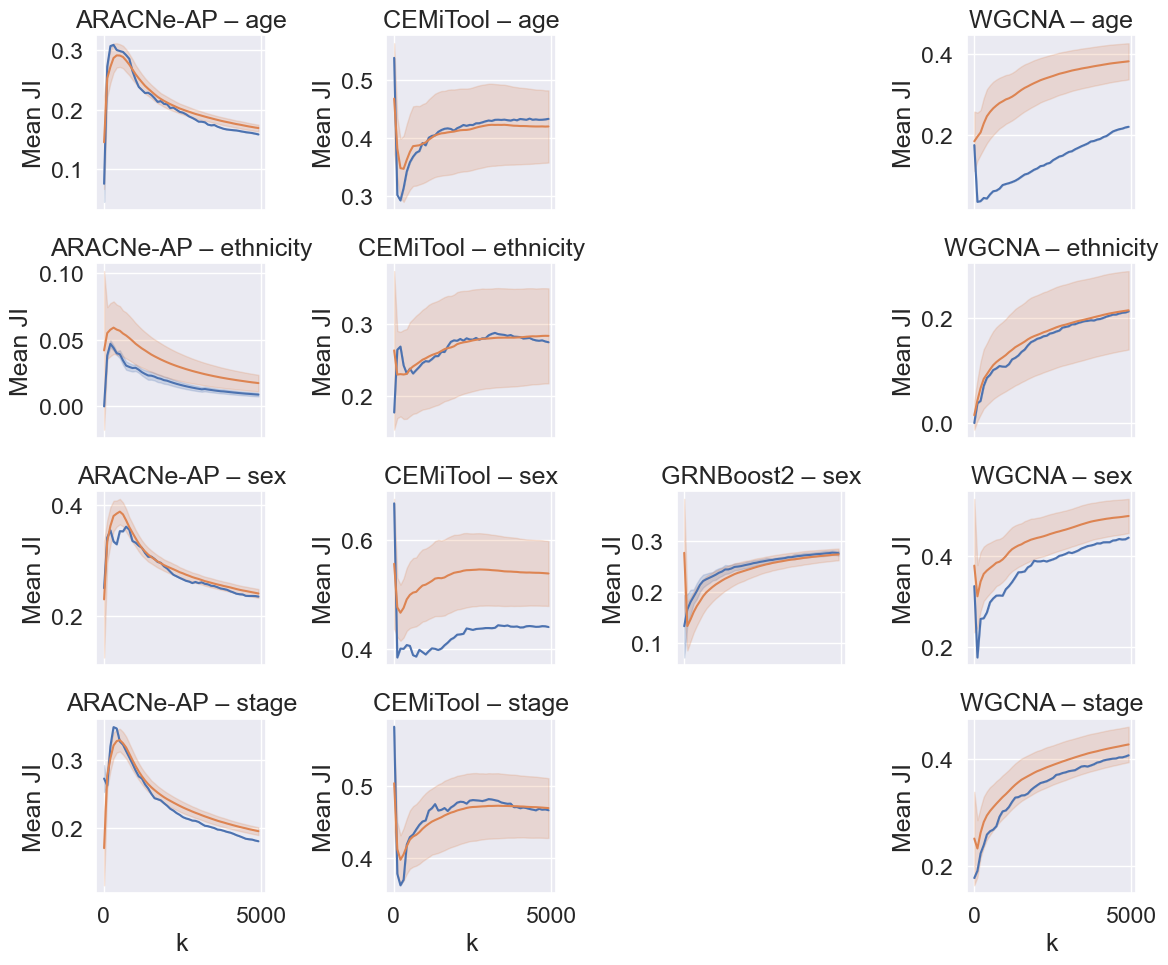

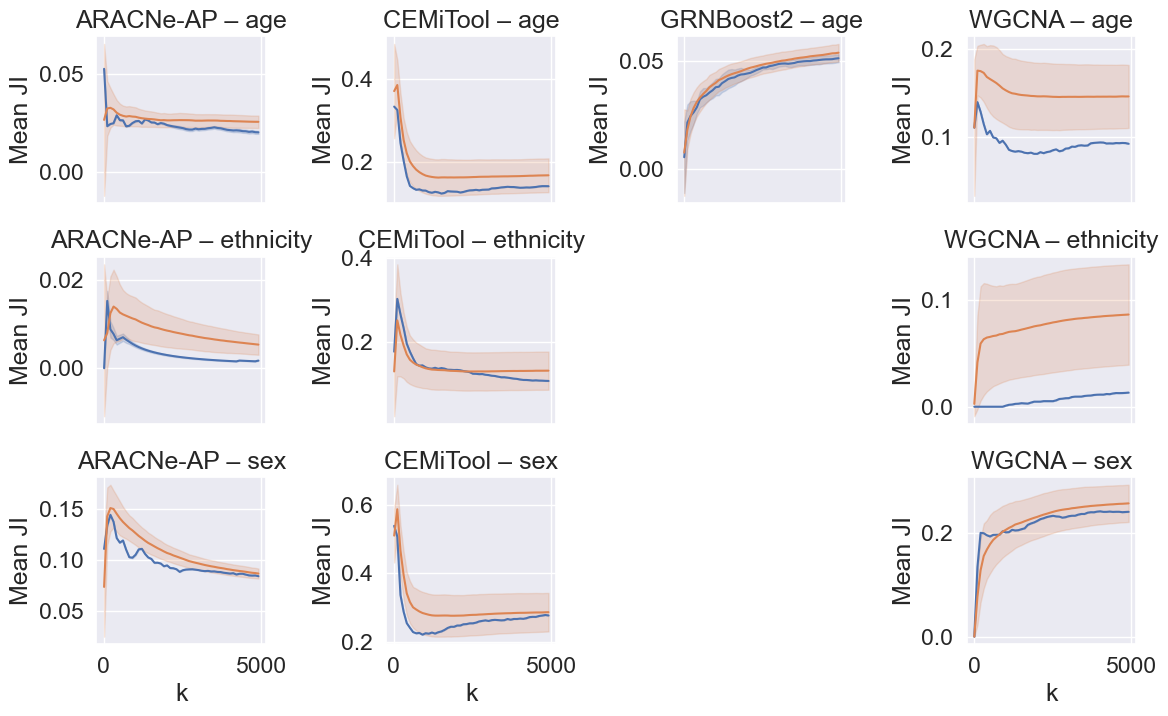

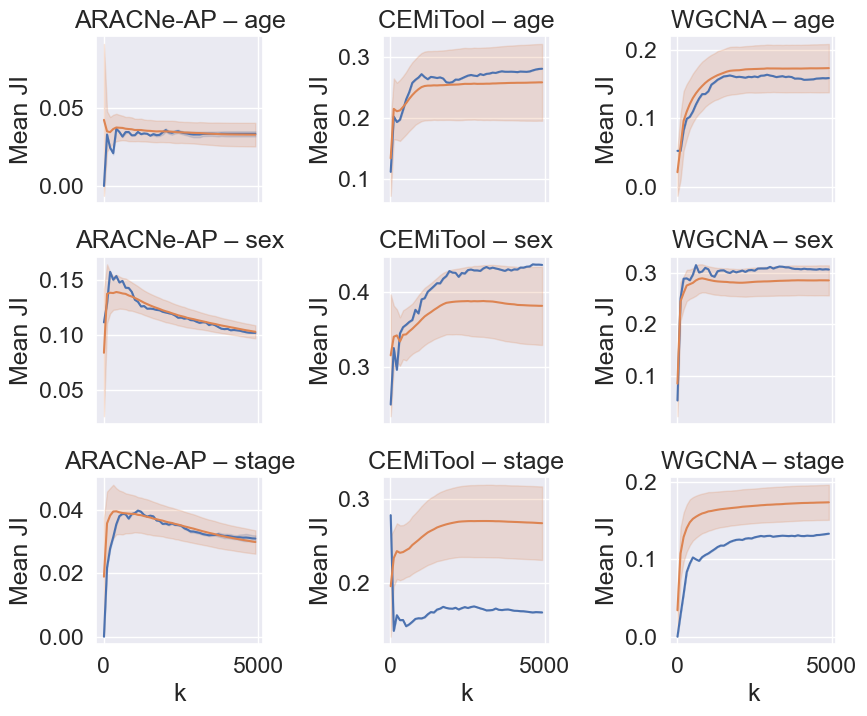

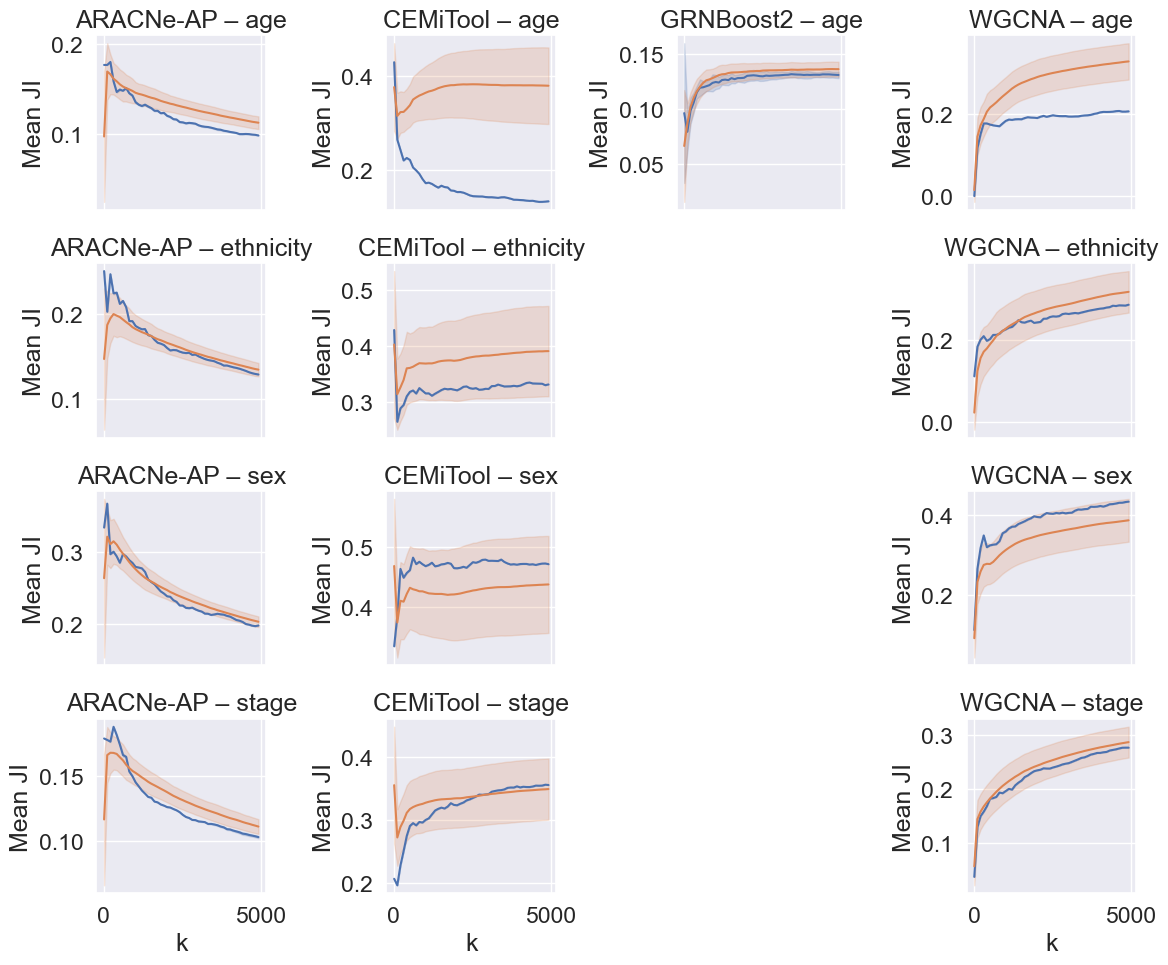

In [126]:
plt.style.use('default')
sns.set(font_scale=1.5)
sns.set_style('darkgrid')
for ct_sel in ct_sels:
    JI_ct = JI_all[JI_all['Cohort']==ct_sel]
    confounders = sorted(list(set(JI_ct['Confounder/\nvariable'].values)))
    algos = sorted(list(set(JI_ct['Method'].values)))
    fig, axs = plt.subplots(len(confounders), len(algos), figsize=(3*len(algos), 2.5*len(confounders)), sharex=True, sharey=False)
    for i, conf in enumerate(confounders):
        JI_conf = JI_ct[JI_ct['Confounder/\nvariable'] == conf]
        for j, algo in enumerate(algos):
            JI_alg = JI_conf[JI_conf['Method'] == algo]
            if JI_alg.shape[0] == 0:
                axs[i, j].axis('off')
            else:
                sns.lineplot(data=JI_alg, x='k', y='Mean JI', ci='sd', ax=axs[i,j], hue='Partition type', legend=False)
                axs[i,j].set_title(f'{algo} – {conf}')
    fig.tight_layout()
    fig.savefig(f'plots/{ct_sel}_block_comparisons.pdf')

## test conf < rnd with one-sided Mann-Whitney-U  test for each k

In [43]:
mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
for alg_sel in ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA']:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
                
mwus.reset_index(inplace=True)
mwus = mwus.drop('index', axis=1).drop('k', axis=1)

count = mwus.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
count.rename(columns={'mwu.pvalue':'total.pvalues'}, inplace=True)

sign_ = mwus[mwus['mwu.pvalue'] < alpha]
sign_ = sign_.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
sign_.rename(columns={'mwu.pvalue':'sign.pvalues'}, inplace=True)

In [44]:
sign = pd.merge(count, sign_,  how='left', left_on=['Method', 'Cohort', 'Confounder/\nvariable'], 
              right_on=['Method', 'Cohort', 'Confounder/\nvariable']).fillna(0)

In [45]:
sign['frac'] = sign['sign.pvalues']/sign['total.pvalues']

In [46]:
sign[sign['frac']>=0.5]

,Method,Cohort,Confounder/\nvariable,total.pvalues,sign.pvalues,frac
0,ARACNe-AP,BRCA,age,50,48.0,0.96
1,ARACNe-AP,BRCA,ethnicity,50,46.0,0.92
2,ARACNe-AP,BRCA,stage,50,49.0,0.98
3,ARACNe-AP,CESC,age,50,49.0,0.98
5,ARACNe-AP,COAD,age,50,49.0,0.98
...,...,...,...,...,...,...
113,WGCNA,READ,age,50,31.0,0.62
115,WGCNA,READ,stage,50,50.0,1.00
116,WGCNA,STAD,age,50,48.0,0.96
117,WGCNA,STAD,ethnicity,50,34.0,0.68


In [58]:
_mwus = pd.DataFrame(sign).reset_index()
_mwus = _mwus[(_mwus['Method'] != 'GRNBoost2') & (_mwus['Method'] != 'GENIE3')]
#_mwus['Confounder/\nvariable'] = _mwus['Confounder/\nvariable'].replace(['ethnicity'], '\n\nethnicity')
_mwus['Confounder/\nvariable'] = pd.Categorical(_mwus['Confounder/\nvariable'], ['age', 'ethnicity', 'sex', 'stage'])

In [48]:
### prepare heatmap
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
cwd = os.getcwd()
alpha = 0.05

def align(pheno, expr):
    keep = pheno.index.isin(expr.index)
    pheno = pheno[keep]
    pheno = pheno[pheno.index.isin(expr.index)]
    samples = pheno.index            
    expr = expr.loc[samples]
    expr = expr.loc[:, (expr.std() != 0)]
    pheno = pheno[pheno.index.isin(expr.index)]
    return pheno, expr

def get_conf_partition(pheno_data_orig, confounder_selector, rank, thresh=0, verbose=False):
    pheno_data = pheno_data_orig.copy()
    indices = None
    blocks = []
    printer = []
    pheno_field = ''  
    if confounder_selector == 'age':
        pheno_field = 'age_at_initial_pathologic_diagnosis'
        if 'age_at_initial_pathologic_diagnosis' not in list(pheno_data.columns):
            pheno_field = 'age'
    elif confounder_selector == 'ethnicity':
        pheno_field = 'race.demographic'
        if 'race.demographic' not in list(pheno_data.columns):
            pheno_field = 'ethnicity'
    elif confounder_selector == 'sex':
        pheno_field = 'gender.demographic'
        if 'gender.demographic' not in list(pheno_data.columns):
            pheno_field = 'sex'
    elif confounder_selector == 'stage':
        pheno_field = 'tumor_stage.diagnoses'
        if 'tumor_stage.diagnoses' not in list(pheno_data.columns):
            pheno_field = 'stage'
        print('stage x:')
        print(len(pheno_data[pheno_data[pheno_field].str.strip().isin(['stage x'])]))
        pheno_data = pheno_data[pheno_data[pheno_field] != 'stage x']
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage ia', 'stage ib', 'stage ic']), pheno_field] = 'stage i'
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage iia', 'stage iib', 'stage iic']), pheno_field] = 'stage ii'
        pheno_data.loc[pheno_data['tumor_stage.diagnoses'].str.strip().isin(['stage iiia', 'stage iiib', 'stage iiic', 'stage iv', 'stage iva', 'stage ivb', 'stage ivc']), pheno_field] = 'stage iii'
    elif confounder_selector == 'type':
        pheno_field = 'cohort'
    print('na:')
    print(len(pheno_data[pheno_data[pheno_field].isna()])+len(pheno_data[pheno_data[pheno_field] == 'not reported']))
    pheno_data = pheno_data[pheno_data[pheno_field].notna()]
    pheno_data = pheno_data[pheno_data[pheno_field] != 'not reported']
    if confounder_selector != 'age':
        blocks = sorted(list(set(pheno_data[pheno_field].str.strip().values)))
        for block_attr in blocks:
            samples = pheno_data.loc[pheno_data[pheno_field].str.strip() == block_attr].index.tolist()
            if len(samples) >= thresh:
                printer.append((samples, block_attr))
    elif confounder_selector == 'age':       
        samples_lower = []
        samples_upper = []
        for cohort in set(pheno_data['cohort'].str.strip().values):
            pheno_cohort = pheno_data[pheno_data['cohort'] == cohort]
            pheno_cohort = pheno_cohort[pheno_cohort[pheno_field] != 'na']
            lower, upper = pheno_cohort[pheno_field].quantile(0.25), pheno_cohort[pheno_field].quantile(0.75)
            if verbose:
                print(f'\tlower quartile: [{pheno_cohort[pheno_field].values.min()},{lower}]')
                print(f'\tupper quartile: ({upper},{pheno_cohort[pheno_field].values.max()}]')
            samples_lower.extend(pheno_cohort.loc[pheno_cohort[pheno_field] <= lower].index.tolist())
            samples_upper.extend(pheno_cohort.loc[pheno_cohort[pheno_field] > upper].index.tolist())
        if len(samples_lower) >= thresh and len(samples_upper) >= thresh:
            printer.append((samples_lower, 'lower'))
            printer.append((samples_upper, 'upper'))
    return printer

def stage_conf_chi(pheno):
    confs = ['age', 'ethnicity', 'sex', 'stage']
    sc = {'age':np.nan, 'ethnicity':np.nan, 'sex':np.nan}
    for conf in confs:
        out = []
        confusion_table = pd.DataFrame()
        orig_conf_partition = get_conf_partition(pheno, conf, 0, thresh=20, verbose=True)
        for bl in orig_conf_partition:
            block = bl[0]
            try:
                stage_partition = get_conf_partition(pheno[pheno.index.isin(block)], 'stage', 0)
            except:
                print('no stage variable')
                continue
            for stage_block in stage_partition:
                confusion_table.loc[stage_block[1], bl[1]] = len(stage_block[0])
        try:
            if len(confusion_table) <= 1:
                continue
            confusion_table = confusion_table.dropna()
            chi2, p, dof, ex = chi2_contingency(confusion_table, correction=False)
            sc[str(conf)] = p
        except:
            continue
    return sc

def get_expression_data(cohort):
    expression_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.htseq_fpkm.tsv'), sep='\t', header=0, index_col=0)
    expression_data.columns = expression_data.columns.str.split('.').str[0].tolist()
    # gene filtering is removed here, because it does not affect the set of samples present in the file
    return expression_data

def get_pheno_data(cohort):
    tissue_type_field, tissue_type = 'sample_type.samples', 'Primary Tumor'
    pheno_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.GDC_phenotype.tsv'), sep='\t', header=0, index_col='submitter_id.samples')
    assert len(pheno_data.iloc[0]) == len(pheno_data.iloc[0].values)
    pheno_data['cohort'] = str(cohort)
    pheno_data =  pheno_data[pheno_data[tissue_type_field] == tissue_type]
    return pheno_data

df = pd.DataFrame(columns=['cohort', 'age', 'ethnicity', 'sex'])
cohorts = ['BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUSC', 'PCPG', 'READ', 'STAD']
for cohort in cohorts:
    # read single data
    expr = get_expression_data(cohort)
    pheno = get_pheno_data(cohort)
    # align pheno and expr
    pheno, expr = align(pheno, expr)
    sc = stage_conf_chi(pheno)
    temp = pd.DataFrame({'cohort':[str(cohort)], 'age':[sc['age']], 'ethnicity':[sc['ethnicity']], 'sex':[sc['sex']]})
    df = pd.concat([df, temp])  
    
df_work = df.copy()
df_work = df_work.dropna().reset_index()
df_work = df_work.reset_index()
df_work.index = df_work['cohort'].values
df_work = df_work.drop(['cohort', 'index', 'level_0'], axis=1)
df_work.columns = ['age', 'ethnicity', 'sex']

def convert_pvalue_to_asterisks(p):
    if p <= 0.0001:
        return 4
    elif p <= 0.001:
        return 3
    elif p <= 0.01:
        return 2
    elif p <= 0.05:
        return 1
    else:
        return 0

na:
1
	lower quartile: [26.0,49.0]
	upper quartile: (67.0,90.0]
stage x:
3
na:
4
stage x:
3
na:
3
na:
95
stage x:
0
na:
0
stage x:
4
na:
1
stage x:
5
na:
8
na:
1
stage x:
12
na:
11
stage x:
12
na:
12
stage x:
0
na:
0
stage x:
0
na:
0
stage x:
0
na:
0
na:
0
	lower quartile: [20,38.0]
	upper quartile: (56.25,88]
stage x:
0
na:
80
stage x:
0
na:
76
na:
36
stage x:
0
na:
20
stage x:
0
na:
30
stage x:
0
na:
209
na:
0
stage x:
0
na:
304
stage x:
0
na:
304
na:
2
	lower quartile: [31.0,58.0]
	upper quartile: (77.0,90.0]
stage x:
0
na:
4
stage x:
0
na:
2
na:
173
stage x:
0
na:
0
stage x:
0
na:
10
na:
2
stage x:
0
na:
4
stage x:
0
na:
7
stage x:
0
na:
13
stage x:
0
na:
0
stage x:
0
na:
0
stage x:
0
na:
0
na:
1
	lower quartile: [21.0,51.25]
	upper quartile: (69.75,89.0]
stage x:
0
na:
39
stage x:
0
na:
39
na:
2
stage x:
0
na:
138
na:
1
stage x:
0
na:
54
stage x:
0
na:
100
stage x:
0
na:
155
na:
1
	lower quartile: [19.0,53.0]
	upper quartile: (69.0,90.0]
stage x:
0
na:
19
stage x:
0
na:
18
na:
15


In [115]:
mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
algs = ['GRNBoost2']
for alg_sel in algs:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
mwus.reset_index(inplace=True)
mwus['Cohort - Variable'] = mwus['Cohort'] + ' – ' + mwus['Confounder/\nvariable']
mwus['k'] = pd.Categorical(mwus['k'], range(10, 5000, 100))
mwus['-log(p)'] = -np.log10(mwus['mwu.pvalue'])
cohort_confs = sorted(list(set(mwus['Cohort - Variable'].values)))

In [225]:
mwus_PCPG = mwus[mwus['Cohort - Variable'] == 'PCPG – age']

In [231]:
mwus_PCPG[mwus_PCPG['mwu.pvalue'] < 0.05].shape[0] / mwus_PCPG.shape[0]

0.46

/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_4241/1166375646.py:56: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


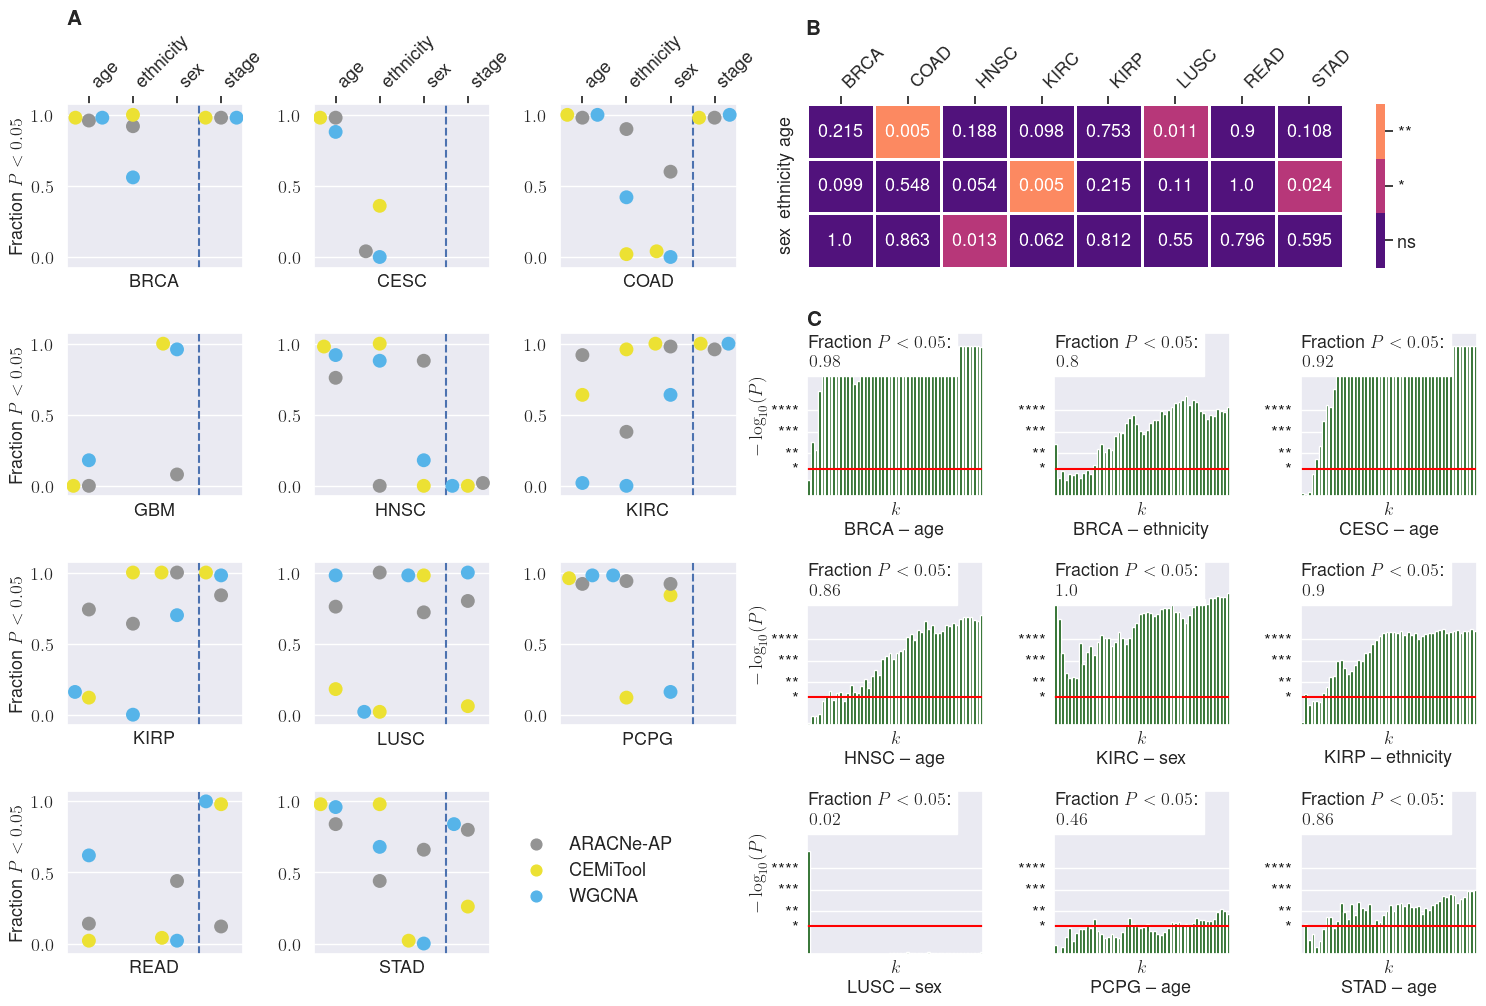

In [234]:
sns.set(font_scale=1.2)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
mosaic = [ct_sels[:3] + ['heatmap' for _ in range(3)],
          ct_sels[3:6] + cohort_confs[:3],
          ct_sels[6:9] + cohort_confs[3:6],
          ct_sels[9:11] + ['.'] + cohort_confs[6:9]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(6*2.5,4*2.5),sharex=False, sharey=False)
for ct_sel in ct_sels:
    _mwus_ct = _mwus[_mwus['Cohort'] == ct_sel]
    sns.swarmplot(data=_mwus_ct, ax=axs[ct_sel], x='Confounder/\nvariable', y='frac', hue='Method', s=10, palette=sns.color_palette('colorblind')[7:10])
    axs[ct_sel].axvline(x=2.5, linestyle='--')
    axs[ct_sel].set_ylim([-0.075, 1.075])
    if ct_sel == ct_sels[0]:
        axs[ct_sel].set_title(r'\textbf{A}',loc='left', fontsize=15)
        sns.move_legend(axs[ct_sel], "lower center", frameon=False, ncol=1, title=None, bbox_to_anchor=(3,-4))
    else:
        axs[ct_sel].legend().set_visible(False)
    if ct_sel in ct_sels[:3]:
        axs[ct_sel].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
    else:
        axs[ct_sel].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    axs[ct_sel].set(xlabel=None, ylabel=None)
    axs[ct_sel].set_xlabel(ct_sel, fontsize=13)
    if ct_sel in [ct_sels[3*i] for i in range(4)]:
        axs[ct_sel].set_ylabel('Fraction $P<0.05$', labelpad=3, fontsize=13)

for cohort_conf in cohort_confs:
    axs[cohort_conf].set_ylim([0, 7.6])
    axs[cohort_conf].axhline(y=-np.log10(0.05), linestyle='-', color='red')
    axs[cohort_conf].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    mwus_cohort_conf = mwus[mwus['Cohort - Variable'] == cohort_conf]
    sns.barplot(data=mwus_cohort_conf, x='k', y='-log(p)', ax=axs[cohort_conf], color='darkgreen')
    axs[cohort_conf].set(ylabel=None)
    axs[cohort_conf].set_yticks([-np.log10(0.05),-np.log10(0.01),-np.log10(0.001),-np.log10(0.0001)])
    axs[cohort_conf].set_yticklabels(['*','**','***','****'], fontsize=13)
    axs[cohort_conf].tick_params(axis='y', which='major', pad=0)
    axs[cohort_conf].set_xlabel('$k$\n'+cohort_conf, fontsize=13)
    if cohort_conf in [cohort_confs[3*i] for i in range(3)]:
        axs[cohort_conf].set_ylabel('$-\log_{10}(P)$', fontsize=13,  labelpad=3)
    if cohort_conf == cohort_confs[0]:
        axs[cohort_conf].set_title(r'\textbf{C}',loc='left', fontsize=15)
    frac = mwus_cohort_conf[mwus_cohort_conf['mwu.pvalue'] < 0.05].shape[0] / mwus_cohort_conf.shape[0]
    axs[cohort_conf].text(.01, .99, f'Fraction $P<0.05$:\n${frac}$', ha='left', va='top', transform=axs[cohort_conf].transAxes,
                          fontsize=13, backgroundcolor='white')
cmap2 = sns.color_palette("magma", 3)

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
sns.heatmap(ast, ax=axs['heatmap'], vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, fmt = '', annot_kws={'fontsize':13}, linewidths=1)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_ymajorticklabels(),fontsize=13)
#axs['heatmap'].set_xticklabels(axs['heatmap'].get_xmajorticklabels())
axs['heatmap'].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=45, ha='left',fontsize=13)
colorbar = axs['heatmap'].collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='13')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=.99,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.savefig('plots/fig2.pdf')

In [55]:
_mwus

,index,Method,Cohort,Confounder/\nvariable,total.pvalues,sign.pvalues,frac
0,0,ARACNe-AP,BRCA,age,50,48.0,0.96
1,1,ARACNe-AP,BRCA,\n\nethnicity,50,46.0,0.92
2,2,ARACNe-AP,BRCA,stage,50,49.0,0.98
3,3,ARACNe-AP,CESC,age,50,49.0,0.98
4,4,ARACNe-AP,CESC,\n\nethnicity,50,2.0,0.04
...,...,...,...,...,...,...,...
115,115,WGCNA,READ,stage,50,50.0,1.00
116,116,WGCNA,STAD,age,50,48.0,0.96
117,117,WGCNA,STAD,\n\nethnicity,50,34.0,0.68
118,118,WGCNA,STAD,sex,50,0.0,0.00


/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'frac'

<Figure size 432x288 with 0 Axes>

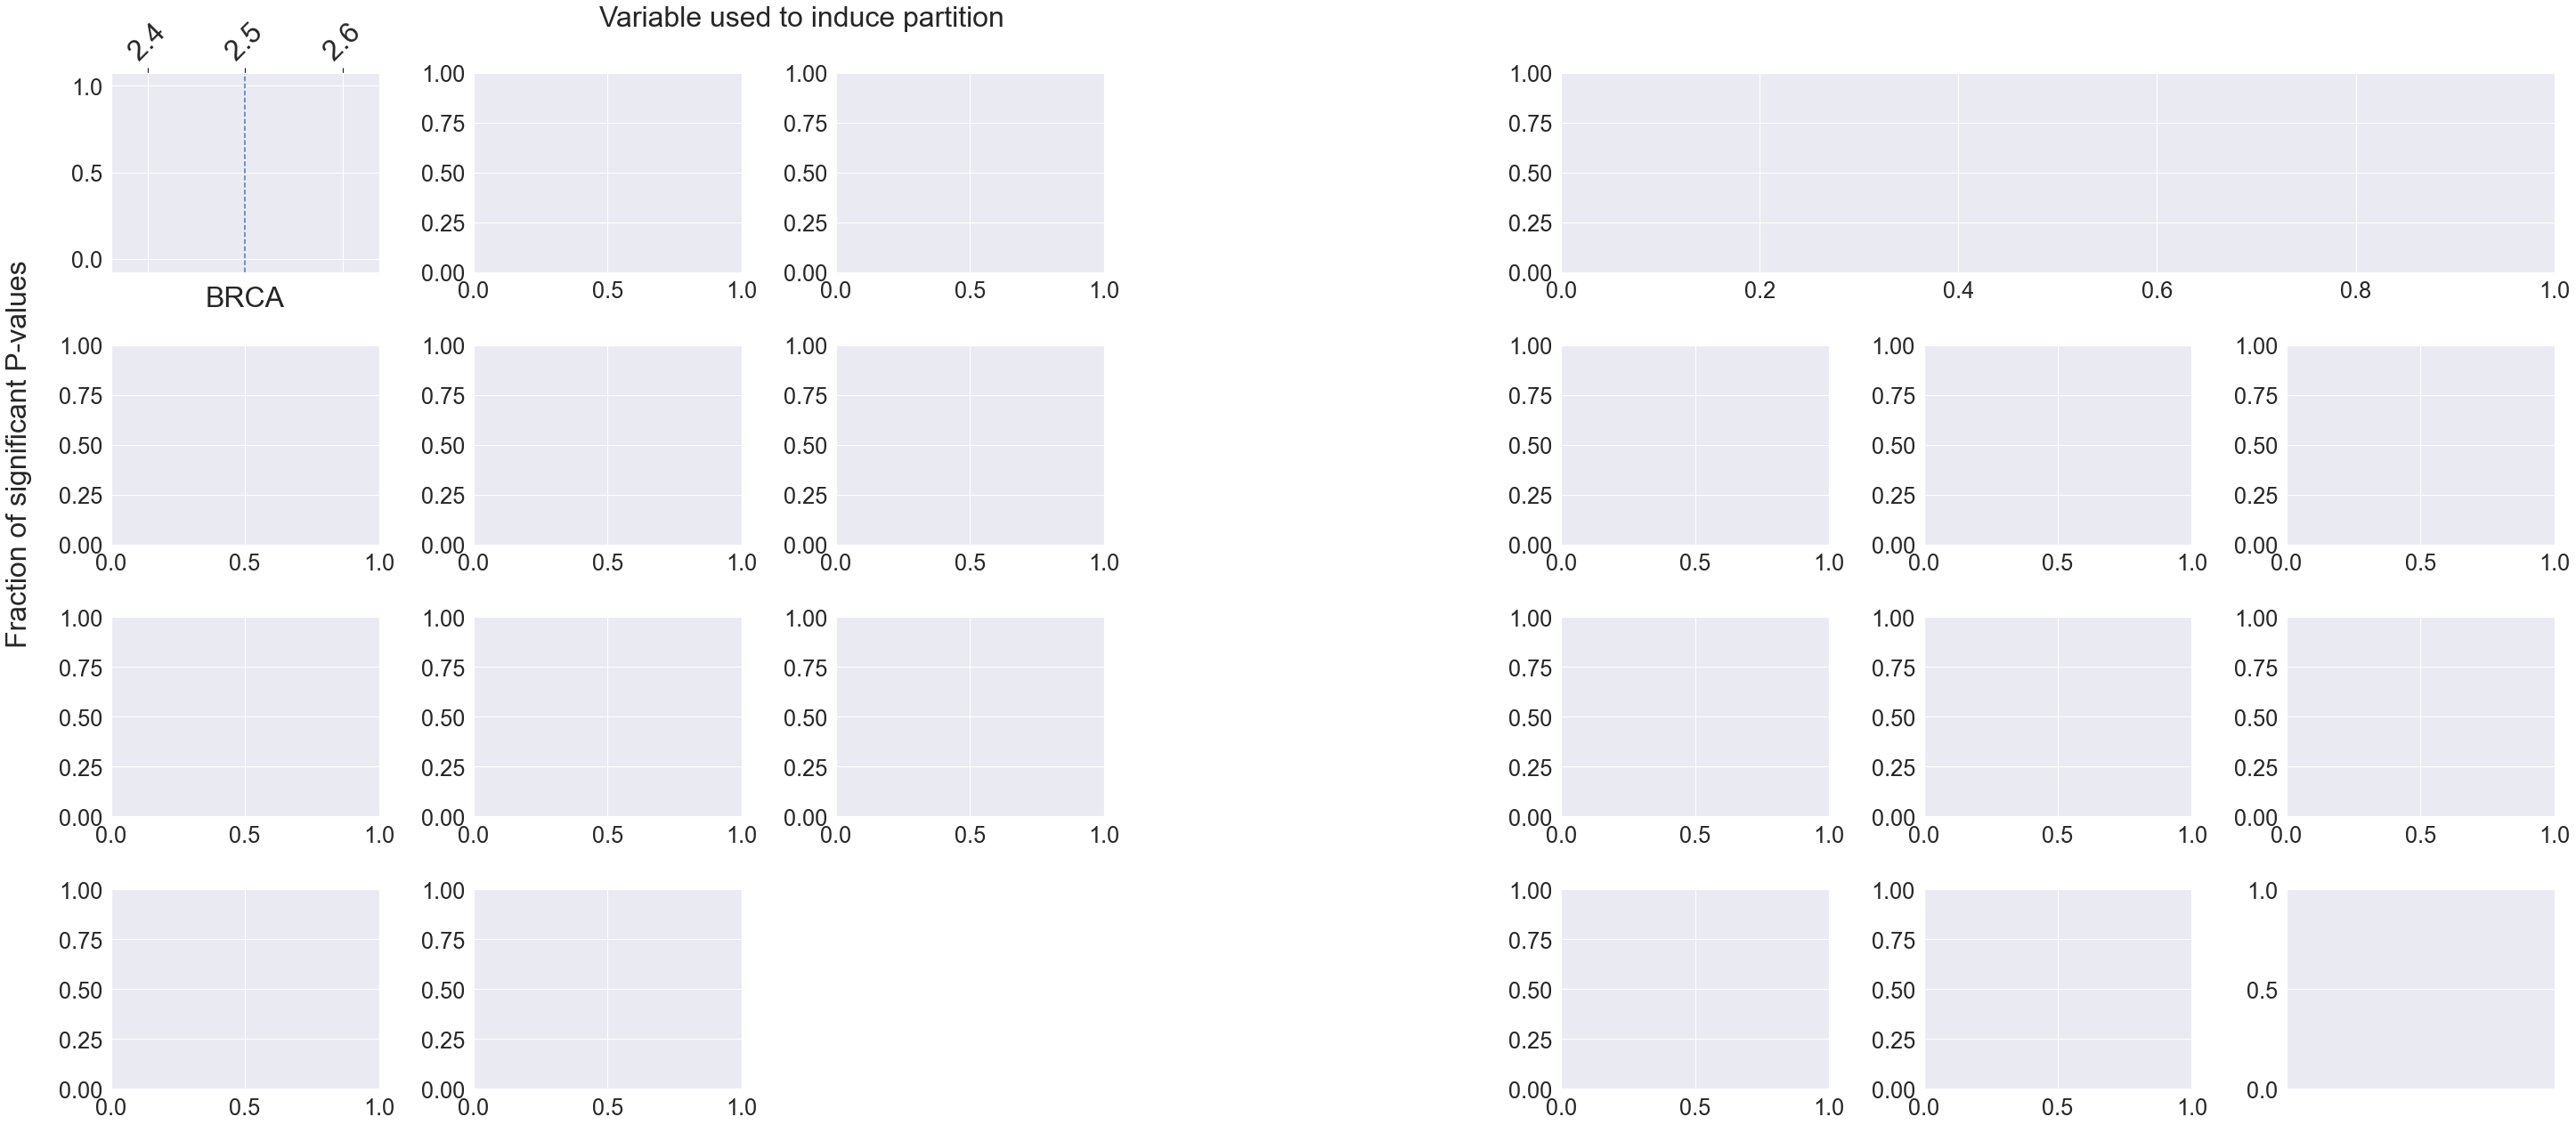

In [62]:
plt.tight_layout()
sns.set(font_scale=2.3)
sns.set_style("darkgrid")
plt.subplots_adjust(bottom=0.1, top=0.2)

mosaic = """
abc.CCC
def.lmn
ghi.opq
jk..rst
"""
fig = plt.figure(layout="tight", figsize=(40,18))
ax_dict = fig.subplot_mosaic(mosaic, sharex=False, sharey=False)

### SWARM PLOT ###
plt.rcParams['axes.titley'] = -0.2
fig.text(0.3, 0.97,'Variable used to induce partition', ha='center', fontsize=32)
fig.text(-0.01, 0.6, 'Fraction of significant P-values', va='center', rotation='vertical', fontsize=32)
plt.yticks([0.0, 0.5, 1.0])
plt.xticks([])

axs = np.array([[ax_dict['a'],ax_dict['b'],ax_dict['c']],
        [ax_dict['d'],ax_dict['e'],ax_dict['f']],
          [ax_dict['g'],ax_dict['h'],ax_dict['i']],
               [ax_dict['j'],ax_dict['k'],0]])

i = j = 0
for ct_sel in ct_sels:
    axs[i,j].set_ylim([-0.075, 1.075])
    axs[i,j].set_title(ct_sel, fontdict={'fontsize': 32})
    axs[i,j].axvline(x=2.5, linestyle='--')
    axs[i,j].tick_params(axis='x', which='major', labelsize=32)
    if i == 0:
        axs[i,j].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    else:
        axs[i,j].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    for tick in axs[i,j].get_xticklabels():
        tick.set_rotation(45)
    g = sns.swarmplot(_mwus[_mwus['Cohort'] == ct_sel], x='Confounder/\nvariable', y='frac', hue='Method', 
                    ax=axs[i,j], s=20, palette=sns.color_palette('colorblind')[7:10], legend=(i==j==0))
    g.set(xlabel=None, ylabel=None)
    j = (j + 1) % 3
    i = i + 1 if j == 0 else i
    
sns.move_legend(axs[0,0], "lower center", frameon=False, ncol=1, title=None, bbox_to_anchor=(3.2,-4.3))
plt.setp(axs[0,0].get_legend().get_texts(), fontsize='32')

### MANHATTAN PLOT ###

axs = np.array([ax_dict['l'], ax_dict['m'], ax_dict['n'], ax_dict['o'], ax_dict['p'],
               ax_dict['q'], ax_dict['r'], ax_dict['s'], ax_dict['t']])
sns.color_palette("hls", 8)
fig.text(-0.01, 0.2, '-log(P-value)', va='center', rotation='vertical', fontsize=32)
plt.yticks([0.0, 2.5, 5.0, 7.5])

mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
algs = ['GRNBoost2']
for alg_sel in algs:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
mwus.reset_index(inplace=True)
mwus['Cohort - Variable'] = mwus['Cohort'] + ' - ' + mwus['Confounder/\nvariable']

mwus['k'] = pd.Categorical(mwus['k'], range(10, 5000, 100))
mwus['-log(p)'] = -np.log10(mwus['mwu.pvalue'])
i = j = 0
for ct_sel in sorted(list(set(sorted(list(mwus['Cohort - Variable'].values))))):
    axs[j].set_ylim([0, 7.6])
    axs[j].set_title(ct_sel, fontdict={'fontsize': 32}, pad=-16)
    axs[j].axhline(y=-np.log10(0.05), linestyle='-', color='red')
    axs[j].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    g = sns.barplot(mwus[mwus['Cohort - Variable'] == ct_sel], x='k', y='-log(p)', ax=axs[j], color='darkgreen')
    g.set(ylabel=None)
    
    j = j + 1
    
### HEAT MAP ###
    
# when getting the (nested) partitions, the 20-sample-threshold is applied for the confounders but removed for the 
# stage variable.
cmap2 = sns.color_palette("magma", 3) 

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
h = sns.heatmap(ast, ax=ax_dict['C'], vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, fmt = '',
                annot_kws={'fontsize':32})
h.set_yticklabels(h.get_ymajorticklabels(), fontsize = 32)
h.set_xticklabels(h.get_xmajorticklabels(), fontsize = 32)

colorbar = h.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='large')
fig.savefig(os.path.join(cwd, 'mosaic.pdf'), bbox_inches='tight')

plt.close(1)
    

In [13]:
sign[sign['Method'] == 'GRNBoost2']

,Method,Cohort,Confounder/\nvariable,total.pvalues,sign.pvalues,frac
74,GRNBoost2,BRCA,age,50,49.0,0.98
75,GRNBoost2,BRCA,ethnicity,50,40.0,0.80
76,GRNBoost2,CESC,age,50,46.0,0.92
77,GRNBoost2,HNSC,age,50,43.0,0.86
78,GRNBoost2,KIRC,sex,50,50.0,1.00
79,GRNBoost2,KIRP,ethnicity,50,45.0,0.90
80,GRNBoost2,LUSC,sex,50,1.0,0.02
81,GRNBoost2,PCPG,age,50,23.0,0.46
82,GRNBoost2,STAD,age,50,43.0,0.86
